In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
traindata = pd.read_csv('train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h1>Problem 1: Predict CentralAir using SalePrice</h1>


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

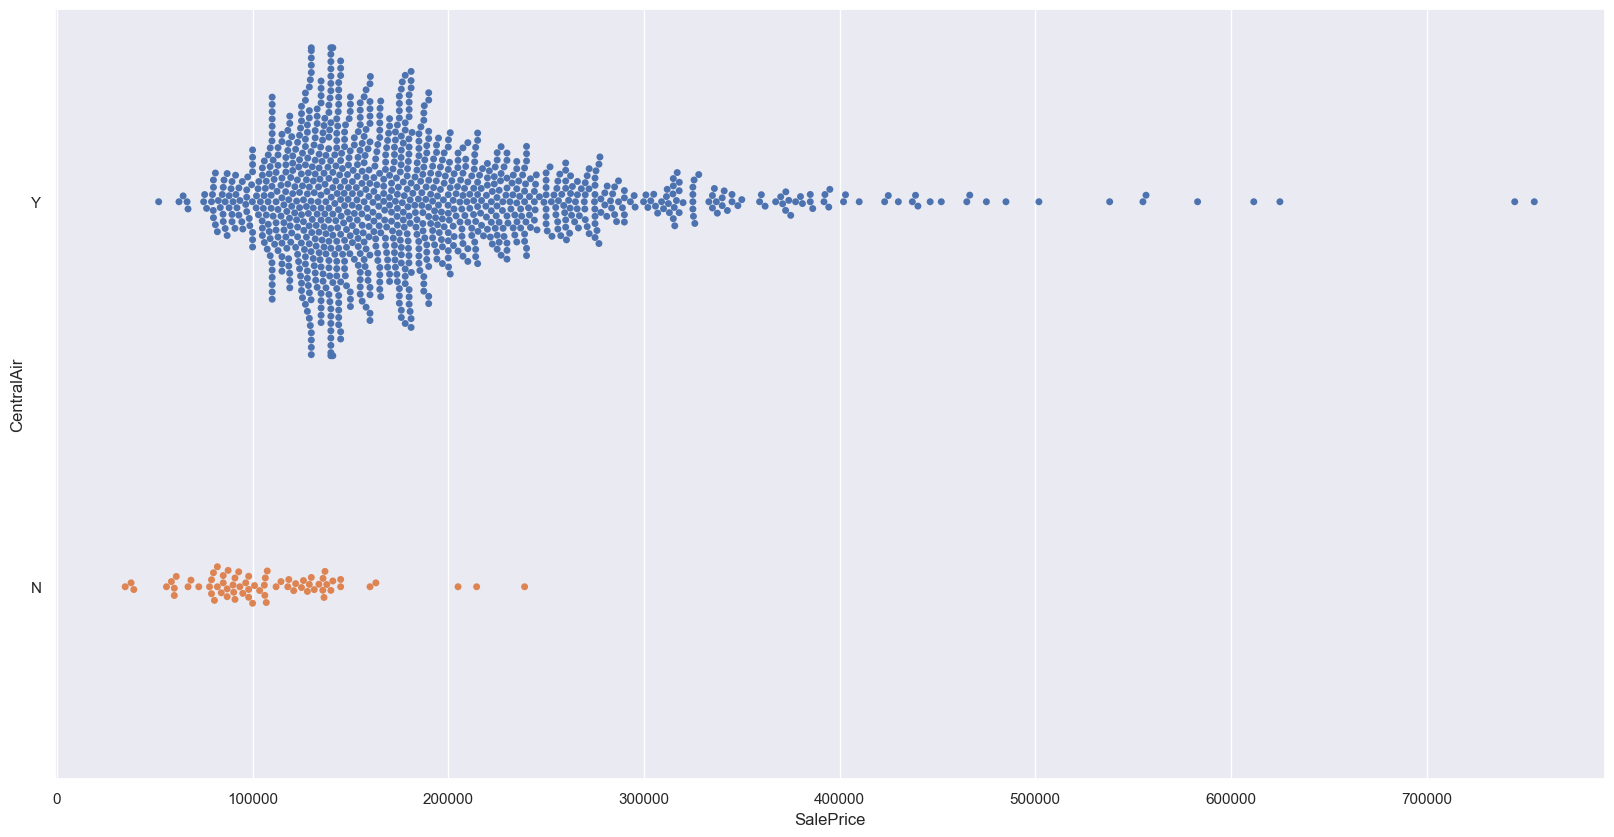

In [4]:
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

CA = pd.DataFrame(traindata['CentralAir'])
SP = pd.DataFrame(traindata['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(SP, CA, test_size = 0.2)
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)


f = plt.figure(figsize=(20, 10))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")



[Text(0.5357142857142857, 0.9, 'SalePrice <= 107700.0\ngini = 0.113\nsamples = 1168\nvalue = [70, 1098]\nclass = Y'),
 Text(0.2619047619047619, 0.7, 'SalePrice <= 61691.5\ngini = 0.455\nsamples = 123\nvalue = [43, 80]\nclass = Y'),
 Text(0.14285714285714285, 0.5, 'SalePrice <= 53996.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = N'),
 Text(0.09523809523809523, 0.3, 'SalePrice <= 45650.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = N'),
 Text(0.047619047619047616, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.19047619047619047, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = N'),
 Text(0.38095238095238093, 0.5, 'SalePrice <= 98150.0\ngini = 0.426\nsamples = 114\nvalue = [35, 79]\nclass = Y'),
 Text(0.2857142857142857, 0.3, 'SalePrice <= 97750.0\ngini = 0.458\nsamples = 76\nvalue = [27, 49]\nclass = Y'),
 Text(0.23809523809523808, 0.1, 'gini = 0.441\nsamples =

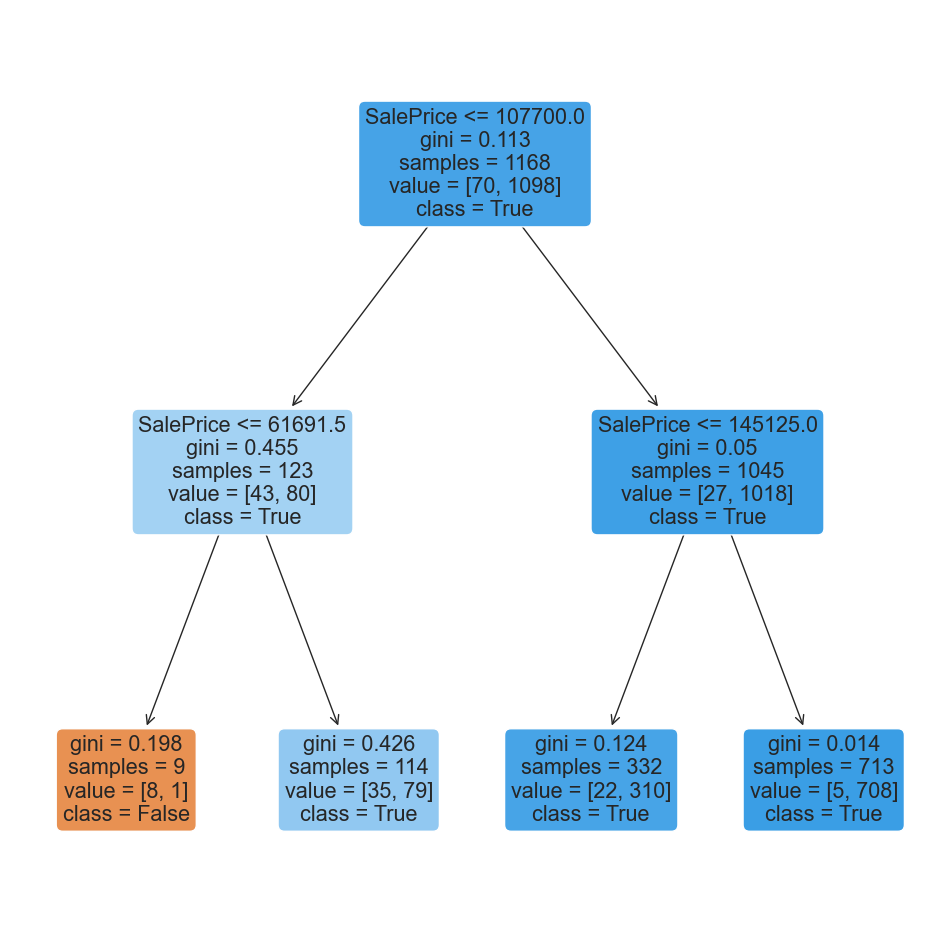

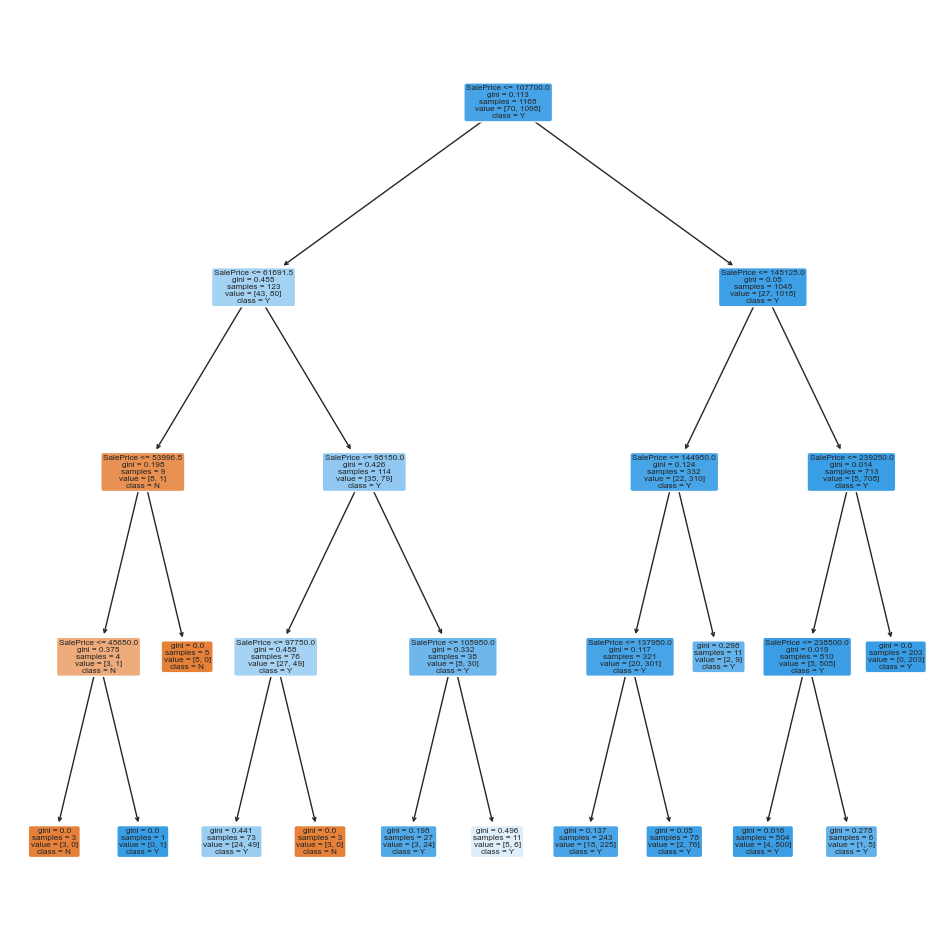

In [25]:
from sklearn.tree import plot_tree
tree1 = DecisionTreeClassifier(max_depth = 2)
tree1.fit(X_train,y_train)


f = plt.figure(figsize=(12,12))
plot_tree(tree1, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["False","True"])

tree2 = DecisionTreeClassifier(max_depth = 4)
tree2.fit(X_train,y_train)


f = plt.figure(figsize=(12,12))
plot_tree(tree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])


<AxesSubplot:>

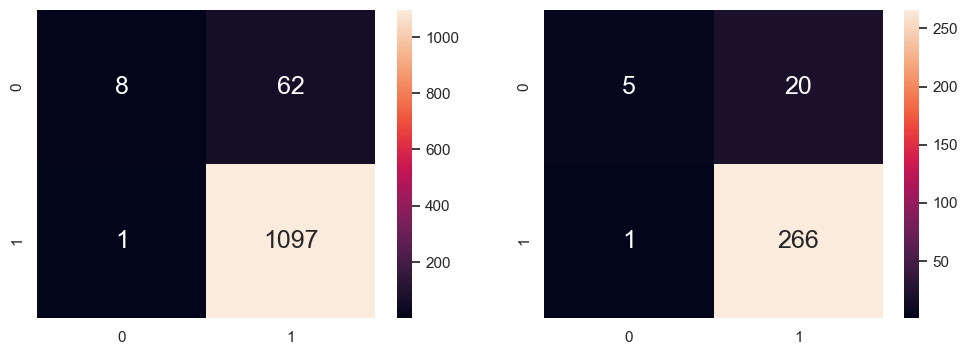

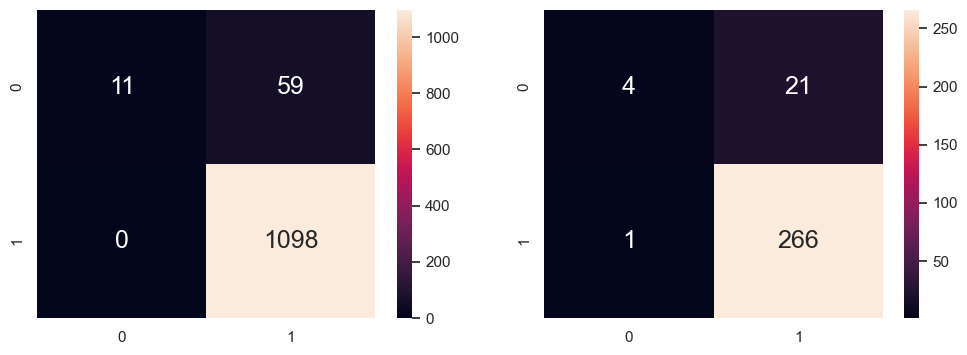

In [12]:
y_train_pred1 = tree1.predict(X_train)
y_test_pred1 = tree1.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# model of max_depth 2
# Predict CentralAir values corresponding to SalePrice
y_train_pred2 = tree2.predict(X_train)
y_test_pred2 = tree2.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [1]:
def values(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0][0]
    fn = cm[1][0]
    tp = cm[1][1]
    fp = cm[0][1]
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    print("TPR \t:", tpr)
    print("FPR \t:", fpr)


print("Model 1")
print("Classification Accuracy in train data \t:",tree1.score(X_train, y_train))
print("Classification Accuracy in test data \t:",tree1.score(X_test, y_test))
print("TPR & FPR for train")
values(y_train,y_train_pred1)
print('')
print("TPR & FPR for test")
values(y_test, y_test_pred1)
print('')
print("Model 2")
print("Classification Accuracy in train data \t:",tree2.score(X_train, y_train))
print("Classification Accuracy in test data \t:",tree2.score(X_test, y_test))
print("TPR & FPR for train")
values(y_train,y_train_pred2)
print('')
print("TPR & FPR for test")
values(y_test,y_test_pred2)


Model 1


NameError: name 'tree1' is not defined

two models perform simililarly in train dataset. hence we compare test and for test the second model is sightly better. but overall both models are good.

<h1> Problem 2</h1>


In [42]:
def classification(predict,response):
    X_train, X_test, y_train, y_test = train_test_split(predict, response, test_size = 0.2)
    dectree = DecisionTreeClassifier(max_depth = 4)
    dectree.fit(X_train,y_train)
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)
    print("Train Data Set")
    print("Classification Accuracy \t: ", dectree.score(X_train, y_train))
    values(y_train,y_train_pred)
    print()
    print("Test Data Set")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()
    
    values(y_test,y_test_pred)
    
CA = pd.DataFrame(traindata['CentralAir'])
OQ = pd.DataFrame(traindata['OverallQual'])
YB = pd.DataFrame(traindata['YearBuilt'])
print("OverallQual vs CentralAir")
classification(OQ,CA)
print('')
print("YearBuilt vs CentralAir")
classification(YB,CA)

OverallQual vs CentralAir
Train Data Set
Classification Accuracy 	:  0.9434931506849316
TPR 	: 0.9927073837739289
FPR 	: 0.8169014084507042

Test Data Set
Classification Accuracy 	: 0.9246575342465754

TPR 	: 0.996268656716418
FPR 	: 0.875

YearBuilt vs CentralAir
Train Data Set
Classification Accuracy 	:  0.9452054794520548
TPR 	: 0.9945553539019963
FPR 	: 0.8787878787878788

Test Data Set
Classification Accuracy 	: 0.8938356164383562

TPR 	: 0.9885931558935361
FPR 	: 0.9655172413793104


For the train dataset:
Classification Accuracy, , TPR and FPR are quite similar for both models hence we look at test data set

For test dataset:
Classification Accuracy for OverallQual is higher than YearBuilt, and YearBuilt has higher TPR and FPR. Hence Year Built is worse and overallqual is better.

<h1> Problem 3 </h1>


[Text(0.5340909090909091, 0.9, 'SalePrice <= 107450.0\ngini = 0.125\nsamples = 1168\nvalue = [78, 1090]\nclass = Y'),
 Text(0.25, 0.7, 'SalePrice <= 61691.5\ngini = 0.479\nsamples = 126\nvalue = [50, 76]\nclass = Y'),
 Text(0.09090909090909091, 0.5, 'SalePrice <= 46000.0\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = N'),
 Text(0.045454545454545456, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = N'),
 Text(0.13636363636363635, 0.3, 'SalePrice <= 53500.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = N'),
 Text(0.09090909090909091, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.18181818181818182, 0.1, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = N'),
 Text(0.4090909090909091, 0.5, 'SalePrice <= 106125.0\ngini = 0.456\nsamples = 114\nvalue = [40, 74]\nclass = Y'),
 Text(0.3181818181818182, 0.3, 'SalePrice <= 98150.0\ngini = 0.444\nsamples = 108\nvalue = [36, 72]\nclass = Y'),
 Text(0.2727272727272727, 0.1, 'gini = 0.472\nsamples = 81\nvalue

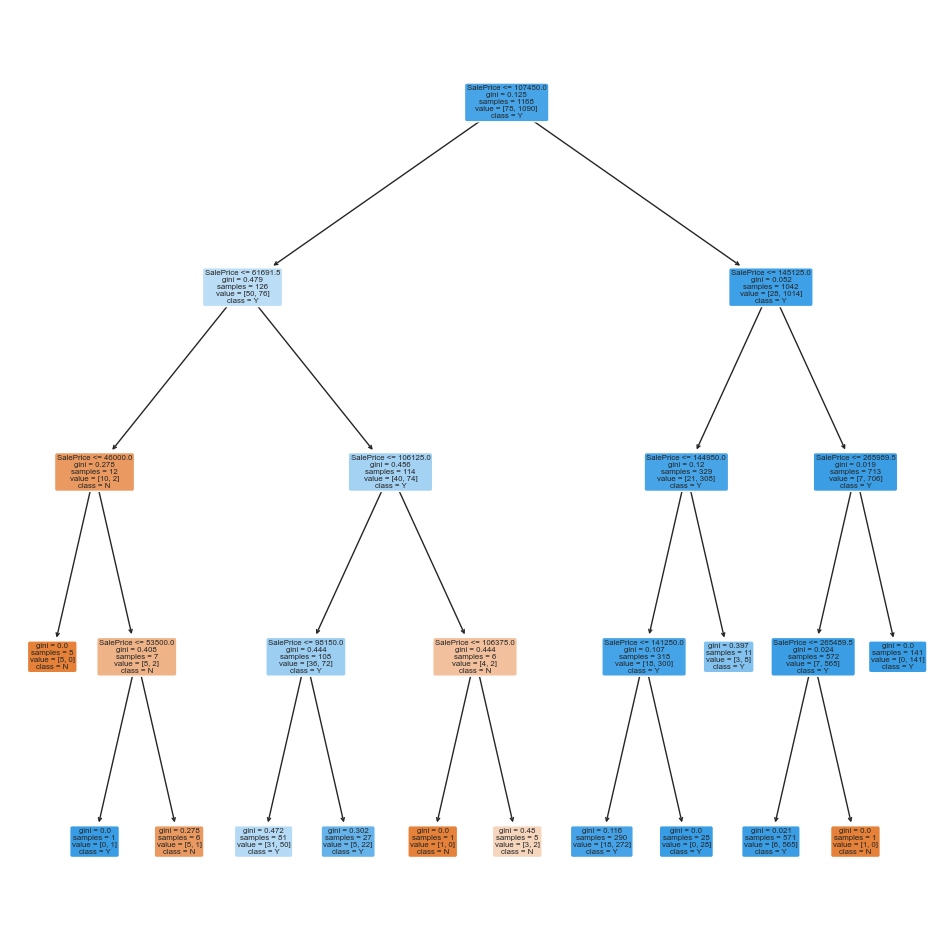

In [45]:
X_train, X_test, y_train, y_test = train_test_split(SP, CA, test_size = 0.2,shuffle = False)
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
tree2 = DecisionTreeClassifier(max_depth = 4)
tree2.fit(X_train,y_train)
f = plt.figure(figsize=(12,12))
plot_tree(tree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])

The leaf with samples = 51 and value = [31,50] has the highest false positive.
This is where saleprice <=107450, >=61691.5,<=95150.0. Hence sale price between 61691.5 and 95150.0. 

In [55]:
# Create a joint dataframe by concatenating SalePrice and CentralAir
jointDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

leaf = jointDF[(jointDF['SalePrice']<=95150.0) & (jointDF['SalePrice']>= 61691.5)]
leaf

,SalePrice,CentralAir
17,90000,Y
29,68500,N
39,82000,N
68,80000,Y
75,91000,Y
...,...,...
1090,92900,N
1131,93500,Y
1137,94000,N
1143,80000,Y


In [53]:
print("3b")
leaf_false = leaf[(leaf['CentralAir'] != 'Y')]
leaf_false

3b


,SalePrice,CentralAir
29,68500,N
30,40000,N
39,82000,N
88,85000,N
98,83000,N
125,84500,N
155,79000,N
242,79000,N
264,73000,N
325,87000,N
